# Assigment 1

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from numba import jit
import random
from mpl_toolkits import mplot3d

%matplotlib notebook

In [2]:
@jit
def mandelbrot(z, maxiter, horizon, log_horizon):
    c = z
    for n in range(maxiter):
        az = abs(z)
        if az > horizon:
            return n - np.log(np.log(az)) / np.log(2) + log_horizon
        z = z * z + c
    return 0


@jit
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, maxiter):
    horizon = 2.0**40
    log_horizon = np.log(np.log(horizon)) / np.log(2)
    r1 = np.linspace(xmin, xmax, width)
    r2 = np.linspace(ymin, ymax, height)
    n3 = np.empty((width, height))
    for i in range(width):
        for j in range(height):
            n3[i, j] = mandelbrot(r1[i] + 1j * r2[j], maxiter, horizon,
                                  log_horizon)
    return (r1, r2, n3)


@jit
def mandelbrot_plot(xmin,xmax,ymin,ymax,width=10,height=10,\
                     maxiter=80,cmap='jet',gamma=0.3):
    dpi = 72
    img_width = dpi * width
    img_height = dpi * height
    x, y, z = mandelbrot_set(xmin, xmax, ymin, ymax, img_width, img_height,
                             maxiter)

    fig, ax = plt.subplots(figsize=(width, height), dpi=72)
    ticks = np.arange(0, img_width, 3 * dpi)
    x_ticks = xmin + (xmax - xmin) * ticks / img_width
    plt.xticks(ticks, x_ticks)
    y_ticks = ymin + (ymax - ymin) * ticks / img_width
    plt.yticks(ticks, y_ticks)

    norm = colors.PowerNorm(gamma)
    ax.imshow(z.T, cmap=cmap, origin='lower', norm=norm)

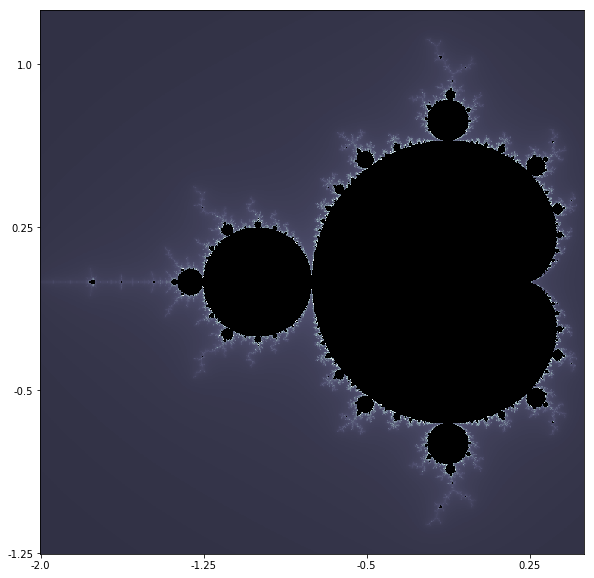

In [3]:
mandelbrot_plot(-2.0, 0.5, -1.25, 1.25, cmap='bone', maxiter=800)

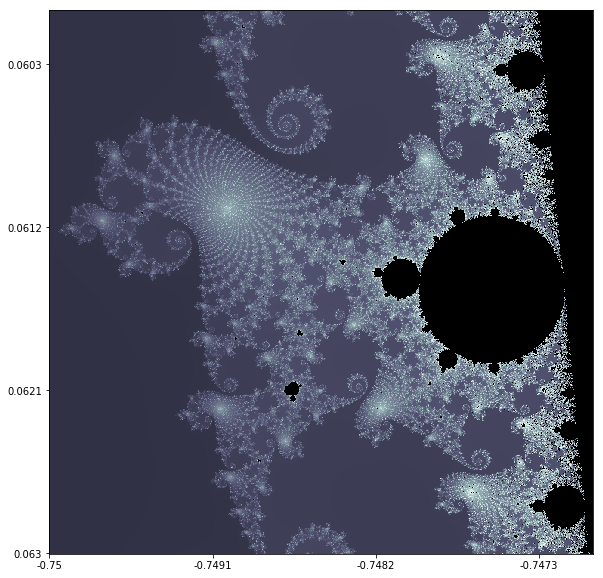

In [4]:
mandelbrot_plot(-0.75, -0.747, 0.063, 0.06, cmap='bone', maxiter=8000)

In [5]:
# Best know estimate according to:
# mrob.com/pub/muency/areaofthemandelbrotset.html
@jit
def real():
    return 1.506591856 + 2.54 * (10**-8)


@jit
def checkInMS(z, maxiter, horizon, log_horizon):
    #     print(z)
    if mandelbrot(z, maxiter, horizon, log_horizon) == 0:
        return 1.0
    return 0.0


@jit
def MonteCarlo(s, i, xmin, xmax, ymin, ymax):
    horizon = 2.0**40
    log_horizon = np.log(np.log(horizon)) / np.log(2)
    area = (xmax - xmin) * (ymax - ymin)
    ctr = 0
    for j in range(s):
        x = xmin + (xmax - xmin) * random.random()
        y = ymin + (ymax - ymin) * random.random()
        z = x + 1j * y
        ctr += checkInMS(z, i, horizon, log_horizon)
    return (ctr / s) * area

In [6]:
result = MonteCarlo(1000000, 8000, -2.0, 0.5, -1.25, 1.25)
print("Approximated with Monte carlo: {}".format(result))
print("Real value: {}".format(real()))

Approximated with Monte carlo: 1.50735
Real value: 1.5065918814


In [20]:
def plotConvergence(steps,
                    maxIterations,
                    maxSamplings,
                    kleur,
                    gamma=0.3,
                    smin=1,
                    imin=1,
                    MonteMethod=MonteCarlo):
    s = np.linspace(smin, maxSamplings, steps + 1).astype('int')
    i = np.linspace(imin, maxIterations, steps + 1).astype('int')
    results = [[0 for j in range(steps + 1)] for i in range(steps + 1)]
    S, I = np.meshgrid(s, i)
    s_in = 0
    i_in = 0
    for s2 in s:
        for i2 in i:
            result = MonteCarlo(s2, i2, -2.0, 0.5, -1.25, 1.25)
            #             print(result)
            results[s_in][i_in] = result
            i_in += 1
        s_in += 1
        i_in = 0
    results = np.array([np.array(xi) for xi in results])
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    #     ax.invert_xaxis()
    ax.set_xlabel("s")
    ax.set_ylabel("i")
    ax.set_zlabel("Score")
    if imin != 1:
        ax.set_zlim(0.75, 2.25)


#     ax.set_zscale('log')
    norm = colors.PowerNorm(gamma)
    res = ax.plot_surface(S, I, results, cmap=kleur, norm=norm)

<IPython.core.display.Javascript object>


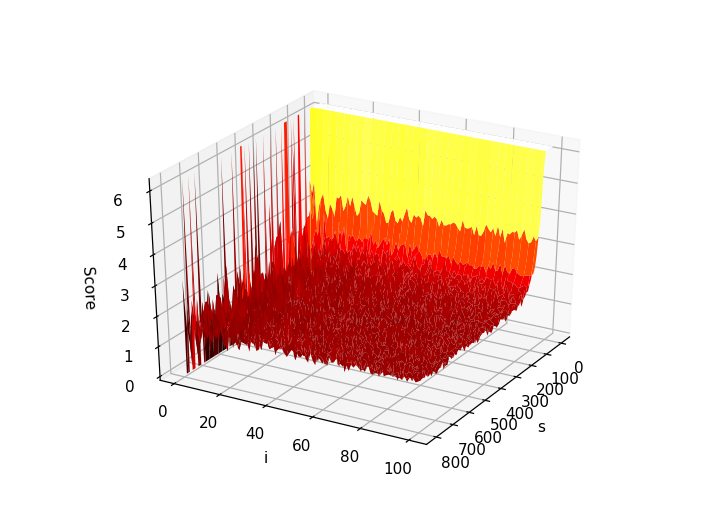

In [21]:
plotConvergence(100, 100, 800, 'hot',gamma=0.8)

<IPython.core.display.Javascript object>


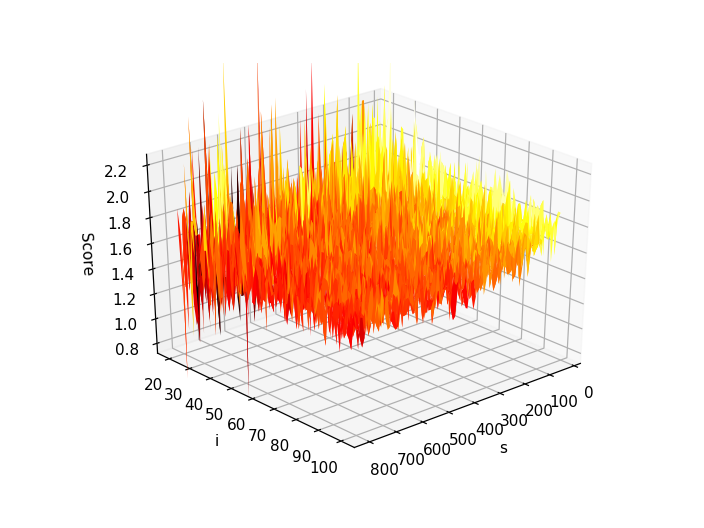

In [19]:
plotConvergence(100, 100, 800, 'hot',gamma=0.8, smin=30, imin=20)

In [120]:
@jit
def plot2D(max_s, max_i, steps=100, vast="i"):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    results = []
    x = None
    maxsi = 0
    if vast == "i":
        i = max_i
        maxsi = max_s
        x = np.linspace(10, max_s, steps)
        for s in x:
            result = MonteCarlo(s, i, -2.0, 0.5, -1.25, 1.25) - real()
            results.append(result)
        ax.set_xlabel("Number of samplings")
    else:
        s = max_s
        maxsi = max_i
        x = np.linspace(10, max_i, steps)
        for i in x:
            result = MonteCarlo(s, i, -2.0, 0.5, -1.25, 1.25) - real()
            results.append(result)
        ax.set_xlabel("Max iterations")
#     print(results)
    ax.set_ylabel("Score")
    ax.plot(x, results, color='b')
    ax.hlines(0,0,maxsi, colors='k', linestyles='--')
    
    
    

<IPython.core.display.Javascript object>


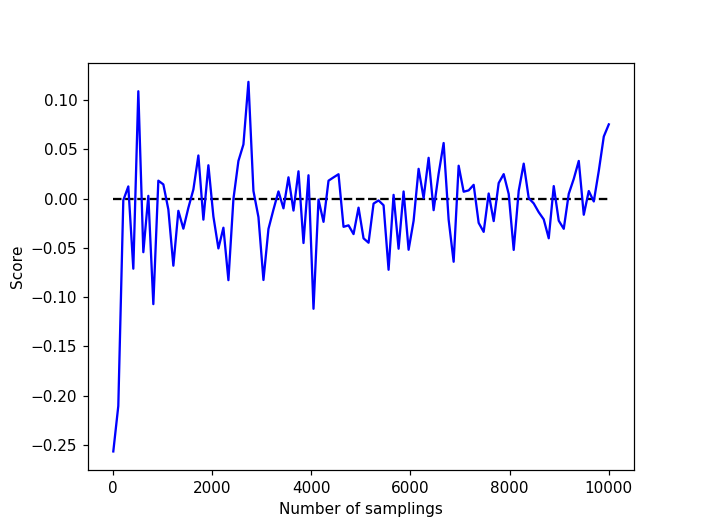

In [122]:
plot2D(10000,800, vast="i")

<IPython.core.display.Javascript object>


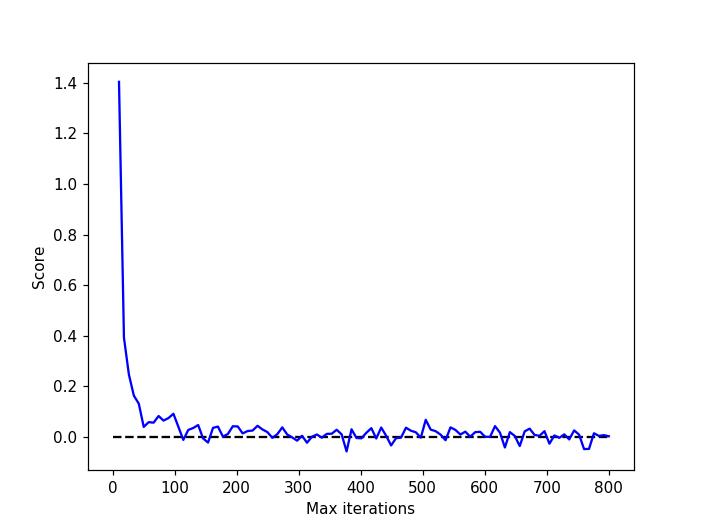

In [123]:
plot2D(10000,800, vast="s")